# KDD Notebook

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns

from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold

from PUMA import *
from create_ds import *

def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [5]:
seed = 331
bags, bags_labels, X_inst, y_inst=gen_data(k = 10, nbags = 500, bag_contfactor = 0.3, seed = seed)
bags = np.array(list(bags.values()))
cont_factor = sum(y_inst)/len(y_inst)
c = Counter(bags_labels)
print("Bags:",c)
print("Instance contamination:", cont_factor)

Bags: Counter({0: 360, 1: 140})
Instance contamination: 0.1012


In [6]:
#Using a single split to create a simple use. Experiments includes n_splits = 5.
skf = StratifiedKFold(n_splits=2, shuffle = True, random_state = seed)
for train_index, test_index in skf.split(bags, bags_labels):
    X_train, X_test = bags[train_index,:,:], bags[test_index,:,:]
    y_train, y_test = bags_labels[train_index], bags_labels[test_index]
    y_inst_test = get_yinst(y_inst, 10, test_index)
    break;

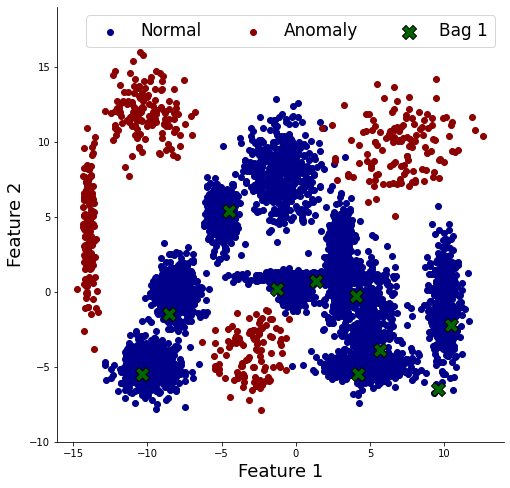

In [7]:
plt.figure(figsize = (8,8))
norm_idx = np.where(y_inst == 0)[0]
anom_idx = np.where(y_inst == 1)[0]
plt.scatter(X_inst[norm_idx].T[0], X_inst[norm_idx].T[1], c='darkblue', label = 'Normal')
plt.scatter(X_inst[anom_idx].T[0], X_inst[anom_idx].T[1], c='darkred', label = 'Anomaly')
examples = bags[100]
plt.scatter(examples.T[0], examples.T[1], s = 200, marker = 'X', c = 'darkgreen', edgecolor = 'black',
           label = 'Bag 1')

plt.ylim(-10,19)
plt.xlabel('Feature 1', fontsize = 18)
plt.ylabel('Feature 2', fontsize = 18)

plt.legend(fontsize = 17, ncol = 3)
sns.despine()
#plt.savefig('artificialds.jpg', bbox_inches = 'tight')
plt.show()

In [12]:
# Hyperparameters
n_pos = 50 #number of positive bags
n_neg = -1 #number of reliable negative bags: -1 means the same as n_pos

#Network structure:
hidden_neurons = [4,2]
batch_size = 16
lr = 0.005
epochs = 300

In [13]:
np.random.seed(seed)

#randomly selecting positive instances (SCAR assumption)
pos_idx = np.random.choice(np.where(y_train == 1)[0], size = n_pos, replace = False)
s = np.zeros(len(y_train))

s[pos_idx] = 1 #it is 1 if the label is given, 0 if it is unlabeled

puma = PUMA(hidden_neurons = hidden_neurons, learning_rate=lr, epochs = epochs, batch_size = batch_size, 
            random_state = seed, n_neg = n_neg, verbose = True)

puma.fit(X_train, s)

inner_autoencoder(
  (activation): ReLU()
  (encoder): Sequential(
    (batch_norm0): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear0): Linear(in_features=2, out_features=4, bias=True)
    (relu0): ReLU()
    (dropout0): Dropout(p=0.1, inplace=False)
    (batch_norm1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.1, inplace=False)
  )
  (decoder): Sequential(
    (batch_norm0): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear0): Linear(in_features=2, out_features=4, bias=True)
    (dropout0): Dropout(p=0.1, inplace=False)
    (batch_norm1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (dropout1): Dropout(p=0.1, inplace=False)
  )
)
epoch 0: training loss 6.5

epoch 79: training loss 3.18198524415493 = (L1 0.6289055496454239 + L2 2.553079754114151)
epoch 80: training loss 3.2714132219552994 = (L1 0.6361282095313072 + L2 2.6352850012481213)
epoch 81: training loss 3.302429288625717 = (L1 0.6610429771244526 + L2 2.641386292874813)
epoch 82: training loss 3.2457114458084106 = (L1 0.6564927771687508 + L2 2.589218657463789)
epoch 83: training loss 3.2415775805711746 = (L1 0.6397839337587357 + L2 2.6017936542630196)
epoch 84: training loss 3.1617837250232697 = (L1 0.6437261942774057 + L2 2.5180575251579285)
epoch 85: training loss 3.189347058534622 = (L1 0.6570384465157986 + L2 2.5323086492717266)
epoch 86: training loss 3.2017763555049896 = (L1 0.63770960457623 + L2 2.564066778868437)
epoch 87: training loss 3.1816698759794235 = (L1 0.6538108289241791 + L2 2.527859076857567)
epoch 88: training loss 3.091974288225174 = (L1 0.6230688355863094 + L2 2.468905448913574)
epoch 89: training loss 3.239077404141426 = (L1 0.6324441768229008 + L2 2.606633234

epoch 169: training loss 2.457052528858185 = (L1 0.7611254528164864 + L2 1.6959270760416985)
epoch 170: training loss 2.4156896099448204 = (L1 0.7999448217451572 + L2 1.6157448031008244)
epoch 171: training loss 2.440468467772007 = (L1 0.7931430004537106 + L2 1.6473254524171352)
epoch 172: training loss 2.484708584845066 = (L1 0.7288553155958652 + L2 1.755853295326233)
epoch 173: training loss 2.4550013542175293 = (L1 0.7568567246198654 + L2 1.6981446221470833)
epoch 174: training loss 2.3909135460853577 = (L1 0.7805416360497475 + L2 1.6103719174861908)
epoch 175: training loss 2.4308194667100906 = (L1 0.7760135270655155 + L2 1.6548059470951557)
epoch 176: training loss 2.4529472291469574 = (L1 0.7976060472428799 + L2 1.655341174453497)
epoch 177: training loss 2.4659076556563377 = (L1 0.7945364192128181 + L2 1.6713712364435196)
epoch 178: training loss 2.3987909704446793 = (L1 0.8038172014057636 + L2 1.5949737802147865)
epoch 179: training loss 2.407608672976494 = (L1 0.79756645113229

epoch 257: training loss 2.3859201222658157 = (L1 0.7537142559885979 + L2 1.63220589235425)
epoch 258: training loss 2.323877274990082 = (L1 0.7383868284523487 + L2 1.5854904502630234)
epoch 259: training loss 2.2025913447141647 = (L1 0.7505453415215015 + L2 1.452045999467373)
epoch 260: training loss 2.3036920726299286 = (L1 0.763158991932869 + L2 1.540533110499382)
epoch 261: training loss 2.269093282520771 = (L1 0.729785330593586 + L2 1.539307925850153)
epoch 262: training loss 2.3901503905653954 = (L1 0.7515846639871597 + L2 1.6385657340288162)
epoch 263: training loss 2.271005302667618 = (L1 0.7685519754886627 + L2 1.5024533607065678)
epoch 264: training loss 2.304837092757225 = (L1 0.7269666753709316 + L2 1.577870398759842)
epoch 265: training loss 2.2423990070819855 = (L1 0.7413124404847622 + L2 1.5010865740478039)
epoch 266: training loss 2.29191542416811 = (L1 0.7580795399844646 + L2 1.5338358730077744)
epoch 267: training loss 2.1651223972439766 = (L1 0.7283748500049114 + L2 

PUMA(batch_norm=True, batch_size=16, cont_factor=0.0625, contamination=0.1,
   dropout_rate=0.1, epochs=300, gpu=None, hidden_activation='relu',
   hidden_neurons=[4, 2], learning_rate=0.005, mu1=0, mu2=1, n_neg=50,
   preprocessing=True, random_state=331, sigma1=0.1, sigma2=0.1,
   verbose=True, weight_decay=1e-05)

In [14]:
bag_pi, instancepij = puma.decision_function(X_test)
bag_pi = bag_pi.reshape(-1)
instancepij = instancepij.reshape(-1)

print("Bag AUC:", roc_auc_score(y_test, bag_pi))
print("Instance AUC:", roc_auc_score(y_inst_test, instancepij))

Bag AUC: 0.9615079365079364
Instance AUC: 0.8871615934627171
